In [2]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os

In [4]:
data_path = "E:/Datasets/MOT20/train/MOT20-02/img1/"
img_path = os.listdir(data_path)

for i in range(len(img_path)):
    img_path[i] = data_path+img_path[i]

img_path[:100]

['E:/Datasets/MOT20/train/MOT20-02/img1/000001.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000002.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000003.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000004.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000005.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000006.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000007.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000008.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000009.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000010.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000011.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000012.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000013.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000014.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000015.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000016.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000017.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000018.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000019

In [19]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
# results = model.track("_1657014482.webp", conf=0.05)  # predict on an image
# results = model.track(img_path[1], conf=0.05)  # predict on an image
results = model.track("stock-footage-sao-paulo-sp-brazil-may-people-form-a-long-line-to-receive-food-donations-for-lunch.webm", conf=0.05)



    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/440) c:\Users\QbaSo\Desktop\sem3\ASO\projekt\ultralytics\stock-footage-sao-paulo-sp-brazil-may-people-form-a-long-line-to-receive-food-donations-for-lunch.webm: 384x640 6 persons, 26.0ms
video 1/1 (2/440) c:\Users\QbaSo\Desktop\sem3\ASO\projekt\ultralytics\stock-footage-sao-paulo-sp-brazil-may-people-form-a-long-line-to-receive-food-donations-for-lunch.webm: 384x640 6 persons, 37.0ms
video 1/1 (3/440) c:\Users\QbaSo\Desktop\sem3\ASO\projekt\ult

In [16]:
import cv2
import numpy as np
import glob

frameSize = (640,640)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 30, frameSize)

for r in results:
    out.write(r.plot())

out.release()

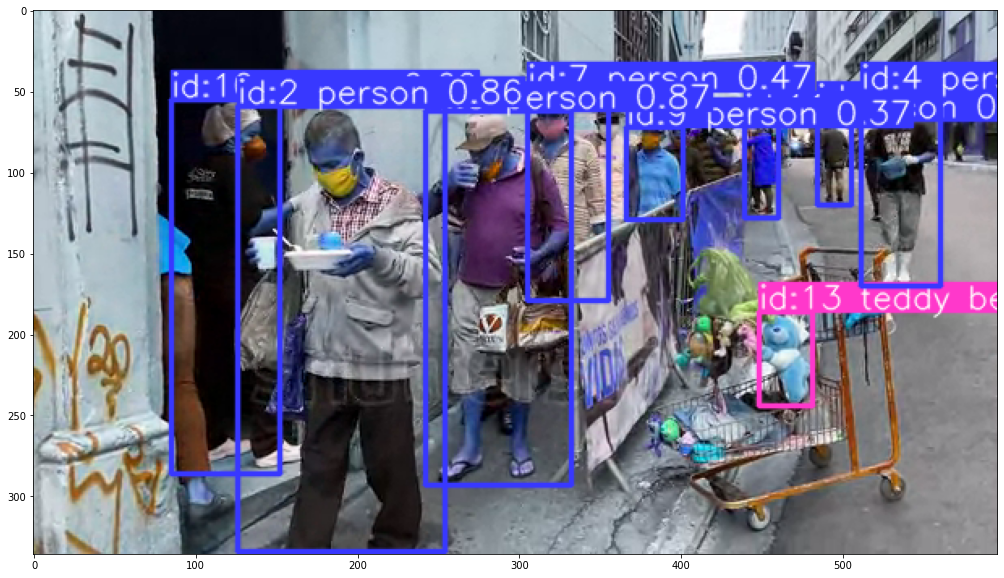

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(results[100].plot())

In [64]:
frames = []

for r in results:
    frames.append({
        int(id) : np.array([float(xywhn[0] + xywhn[2]/2), float(xywhn[2] + xywhn[3]/2)])
        for id, xywhn in zip(r.boxes.id, r.boxes.xywhn)})
        
df = pd.DataFrame(frames)

# calculating velocity [image norm size/frame]
for i in df.columns:
    df[f'v_{i}'] = df[i].diff().pow(2).apply(np.sum).pow(1/2)

<AxesSubplot:>

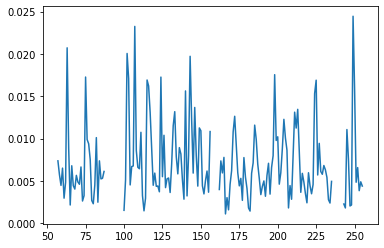

In [104]:
df['v_15'].plot()

# Plot performance

In [22]:
analitics = pd.read_csv("performance.csv")

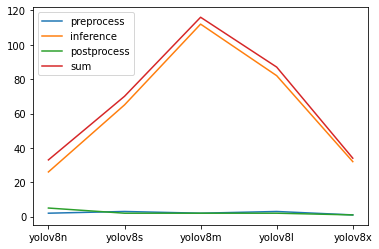

In [42]:
cols = ['preprocess', 'inference', 'postprocess', 'sum']
analitics[cols].plot()
my_xticks = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x']
x = np.array([0,1,2,3, 4])
plt.xticks(x, my_xticks)
plt.show()